# INCLUDES DATA UNDERSTANDING, IN-DEPTH EDA AND 1ST ATTEMPT OF PREPROCESSING + FEATURE ENGINEERING + MODEL BUILDING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/raw/data.csv')

## **DATA UNDERSTANDING**

In [3]:
df.shape

(116023, 52)

In [4]:
df.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.sample(7)

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,device.flashVersion,geoNetwork.region,trafficSource,totals.visits,geoNetwork.networkLocation,sessionId,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,trafficSource.adwordsClickInfo.page,geoNetwork.metro,pageViews,locationZone,device.mobileDeviceModel,trafficSource.referralPath,totals.bounces,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
73960,NaN,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,85726,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,Masovian Voivodeship,google,1,not available in demo dataset,1509466266,Windows,Eastern Europe,organic,NaN,not available in demo dataset,Poland,not available in demo dataset,NaN,Not Socially Engaged,Warsaw,NaN,(not set),6.0,8,not available in demo dataset,NaN,NaN,20171031,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1509466266,Europe,False,1.0
46618,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,37723,(not set),not available in demo dataset,domain2,0,not available in demo dataset,1,not available in demo dataset,(not set),(direct),1,not available in demo dataset,1486967495,Windows,Southeast Asia,(none),NaN,not available in demo dataset,Singapore,not available in demo dataset,NaN,Not Socially Engaged,(not set),NaN,(not set),3.0,8,not available in demo dataset,NaN,NaN,20170212,not available in demo dataset,desktop,Direct,not available in demo dataset,3,not available in demo dataset,1486967495,Asia,False,1.0
43809,True,76990000.0,Safari,not available in demo dataset,NaN,(not provided),medium,Region_1,NaN,not available in demo dataset,not available in demo dataset,77643,(not set),not available in demo dataset,domain1,0,not available in demo dataset,3,not available in demo dataset,California,google,1,not available in demo dataset,1489786854,iOS,Northern America,organic,NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,San Francisco,NaN,San Francisco-Oakland-San Jose CA,35.0,8,not available in demo dataset,NaN,NaN,20170317,not available in demo dataset,tablet,Organic Search,not available in demo dataset,38,not available in demo dataset,1489786854,Americas,True,NaN
89251,True,81700000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,7904,(not set),not available in demo dataset,domain2,0,not available in demo dataset,2,not available in demo dataset,New York,(direct),1,not available in demo dataset,1473873900,Macintosh,Northern America,(none),NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,New York,NaN,New York NY,14.0,8,not available in demo dataset,/,NaN,20160914,not available in demo dataset,desktop,Referral,not available in demo dataset,14,not available in demo dataset,1473873900,Americas,False,NaN
92153,NaN,54370000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_5,NaN,not available in demo dataset,not available in demo dataset,82602,(not set),not available in demo dataset,domain1,0,not available in demo dataset,1,not available in demo data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

### 🎯 Target Variable
`purchaseValue` → 💰 The total amount of money spent by the user during that session.
This is what we are trying to predict.

### 🚦 Traffic & Marketing Info
`trafficSource.isTrueDirect` → Whether the visit came directly (like typing the URL) or not.

`trafficSource` → Broad source of the traffic (e.g., Google, Facebook, etc.)

`trafficSource.adContent` → Text or name of the ad content that brought the user (if any).

`trafficSource.keyword` → Search keyword user typed (if came via search ad).

`trafficSource.campaign` → Name of the marketing campaign.

`trafficSource.medium` → Type of channel like organic, CPC, referral, etc.

`trafficSource.adwordsClickInfo.slot` → Ad position (top, bottom, etc.) if user came via Google Ads.

`trafficSource.adwordsClickInfo.isVideoAd` → Whether the ad was a video ad or not.

`trafficSource.adwordsClickInfo.adNetworkType` → Type of ad network (search, display, etc.)

`trafficSource.adwordsClickInfo.page` → Page number where ad appeared.

`trafficSource.referralPath` → The path or link from which the user was referred (if not direct).

### 📱 Device Info
`browser` → Name of browser (e.g., Chrome, Firefox).

`browserMajor` → Major version of the browser.

`deviceType` → Desktop, mobile, tablet, etc.

`os` → Operating system (Android, iOS, Windows).

`device.operatingSystemVersion` → OS version (e.g., iOS 15).

`device.isMobile` → True if device is mobile, else false.

`device.language` → Language setting on the browser/device.

`device.browserVersion` → Full browser version.

`device.browserSize` → Size of browser window.

`device.screenResolution` → Screen resolution (e.g., 1080x1920).

`screenSize` → Physical screen size (e.g., 5.5 inches).

`device.screenColors` → Number of screen colors supported.

`device.flashVersion` → Version of Flash (older metric, may be irrelevant).

`device.mobileDeviceBranding` → Brand name of mobile device (e.g., Samsung).

`device.mobileDeviceModel` → Model of mobile device (e.g., Galaxy S10).

`device.mobileInputSelector` → Type of input used (touch, stylus, etc.)

`device.mobileDeviceMarketingName` → Marketing name of mobile (e.g., “iPhone 13 Pro”).

### 👤 User Identity & Session Info
`userId` → Unique ID of the user.

`sessionId` → Unique ID for the session (a visit to the website).

`sessionNumber` → How many times this user has visited before (e.g., 5 = 5th session).

`sessionStart` → Time when the session started (usually a timestamp).

`gclIdPresent` → Whether a Google Click ID was present (for ad tracking).

`userChannel` → Marketing channel user came from (e.g., Email, Paid Search).

### 📍 Location & Geo Info
`locationCountry` → Country of the user.

`geoNetwork.continent` → Continent (e.g., Asia, Europe).

`geoNetwork.subContinent` → Sub-continent (e.g., South Asia).

`geoNetwork.region` → Region/state within the country.

`geoNetwork.city` → City name.

`geoNetwork.metro` → Metro area (large urban regions).

`geoNetwork.networkLocation` → ISP-level info (may be generic).

`geoNetwork.networkDomain` → Internet domain of the network (e.g., airtel.in).

`geoCluster` → Custom geographic cluster label (e.g., Zone A, Zone B).

`locationZone` → Another form of geographic segmentation (custom zones).

### 🧭 Behavioral / Engagement Info
`pageViews` → Number of pages viewed in that session.

`totalHits` → Total events triggered (pageviews, clicks, etc.)

`totals.visits` → Number of total visits by user.

`totals.bounces` → Whether the user bounced (left after one page).

`new_visits` → 1 if user is new, 0 if returning.

`socialEngagementType` → Whether social media engagement happened (typically Socially Engaged or Not).

`date` → Date of session (usually in YYYYMMDD format).

In [8]:
df.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


### purchaseValue, sessionNumber, pageViews, totalHits are the columns having outliers
### Many columns have similar values for large number of samples

In [9]:
df.isnull().sum()

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        0
device.fla

In [10]:
df.duplicated().sum()

236

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(115787, 52)

## **EXPLORATORY DATA ANALYSIS**

In [14]:
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()
print(len(categorical_cols))
print()
categorical_cols

38



['trafficSource.isTrueDirect',
 'browser',
 'device.screenResolution',
 'trafficSource.adContent',
 'trafficSource.keyword',
 'screenSize',
 'geoCluster',
 'trafficSource.adwordsClickInfo.slot',
 'device.mobileDeviceBranding',
 'device.mobileInputSelector',
 'trafficSource.campaign',
 'device.mobileDeviceMarketingName',
 'geoNetwork.networkDomain',
 'device.operatingSystemVersion',
 'device.flashVersion',
 'geoNetwork.region',
 'trafficSource',
 'geoNetwork.networkLocation',
 'os',
 'geoNetwork.subContinent',
 'trafficSource.medium',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'browserMajor',
 'locationCountry',
 'device.browserSize',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'socialEngagementType',
 'geoNetwork.city',
 'geoNetwork.metro',
 'device.mobileDeviceModel',
 'trafficSource.referralPath',
 'device.language',
 'deviceType',
 'userChannel',
 'device.browserVersion',
 'device.screenColors',
 'geoNetwork.continent',
 'device.isMobile']

In [15]:
# Set default style
sns.set(style='whitegrid', palette='Set2')
plt.rcParams['figure.figsize'] = (12, 6)

In [16]:
# for col in categorical_cols:
#     plt.figure(figsize=(12, 5))
#     sns.countplot(data=df, x=col, order=df[col].value_counts().index[:20])  # Limit top 20 categories
#     plt.title(f'Count Distribution of {col.upper()}')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(len(numeric_cols))
print()
numeric_cols

14



['purchaseValue',
 'userId',
 'gclIdPresent',
 'sessionNumber',
 'totals.visits',
 'sessionId',
 'trafficSource.adwordsClickInfo.page',
 'pageViews',
 'locationZone',
 'totals.bounces',
 'date',
 'totalHits',
 'sessionStart',
 'new_visits']

In [18]:
# for col in numeric_cols:
#     plt.figure(figsize=(10, 5))
#     sns.histplot(df[col].dropna(), kde=True, bins=50)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel("Frequency")
#     plt.tight_layout()
#     plt.show()

In [19]:
# # Raw
# plt.figure(figsize=(10, 5))
# sns.histplot(df['purchaseValue'].dropna(), kde=True, bins=100)
# plt.title("Purchase Value Distribution (Raw)")
# plt.tight_layout()
# plt.show()

# # Log-scaled
# df['log_purchaseValue'] = np.log1p(df['purchaseValue'])

# plt.figure(figsize=(10, 5))
# sns.histplot(df['log_purchaseValue'].dropna(), kde=True, bins=100)
# plt.title("Log-Scaled Purchase Value Distribution")
# plt.tight_layout()
# plt.show()

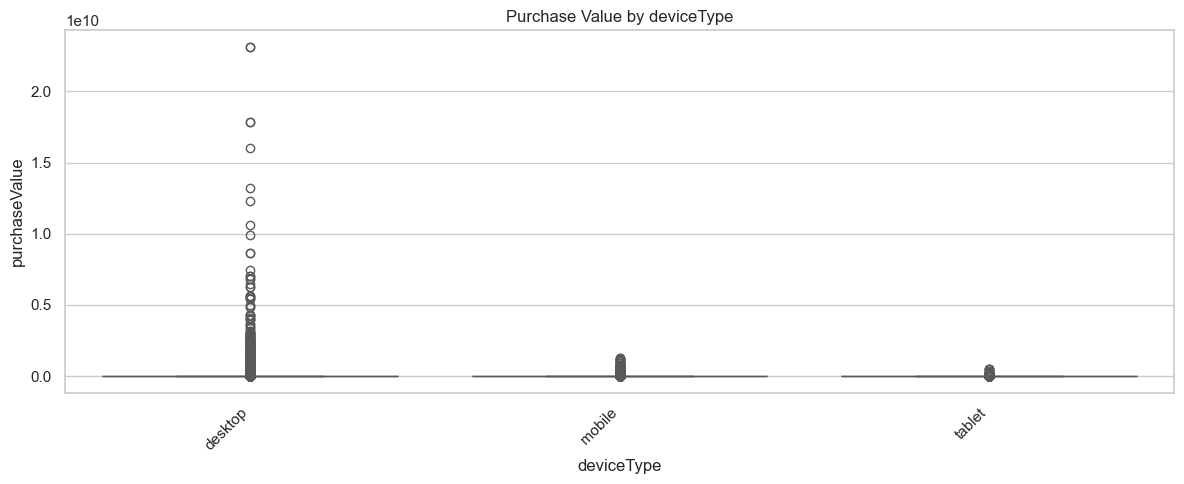

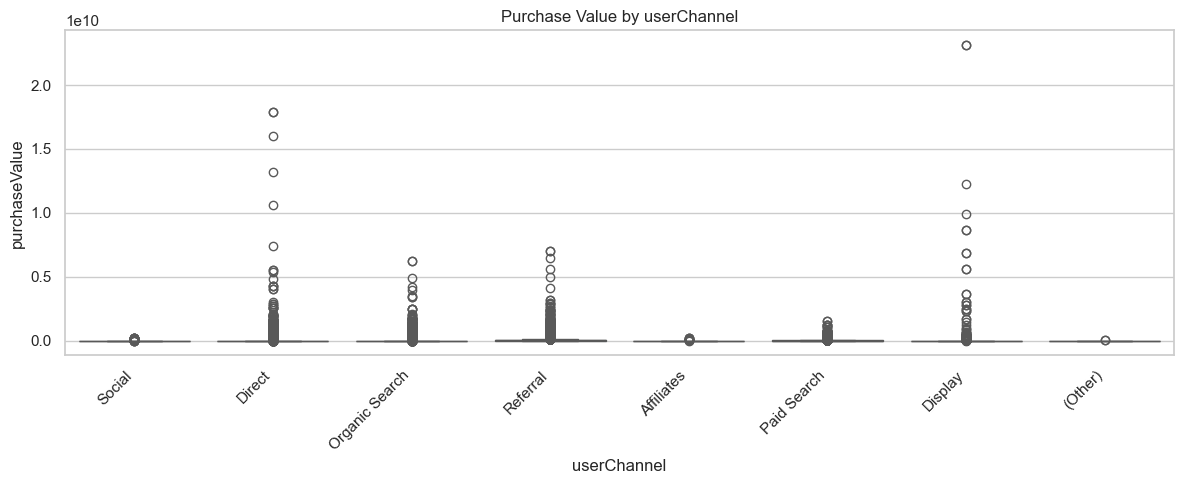

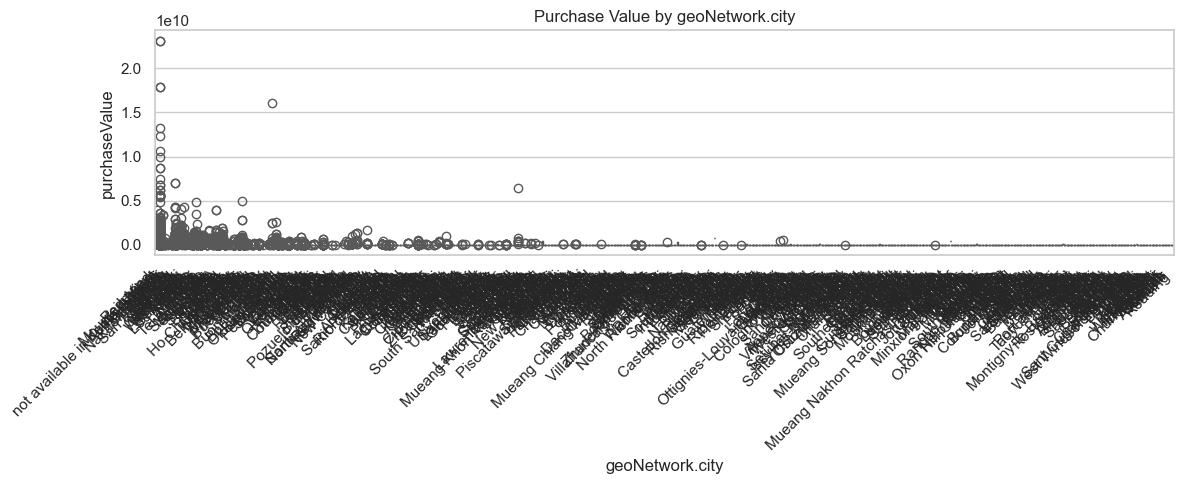

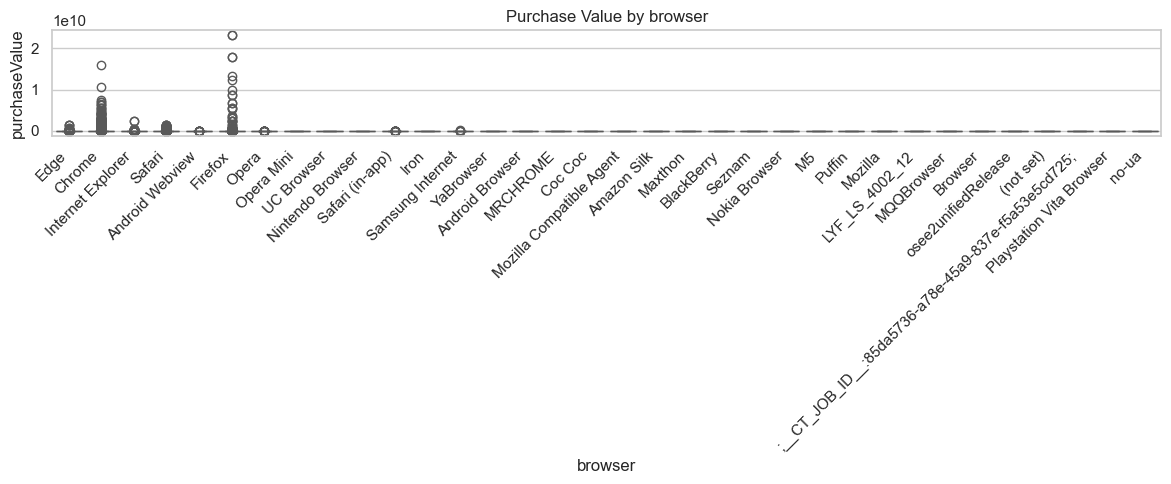

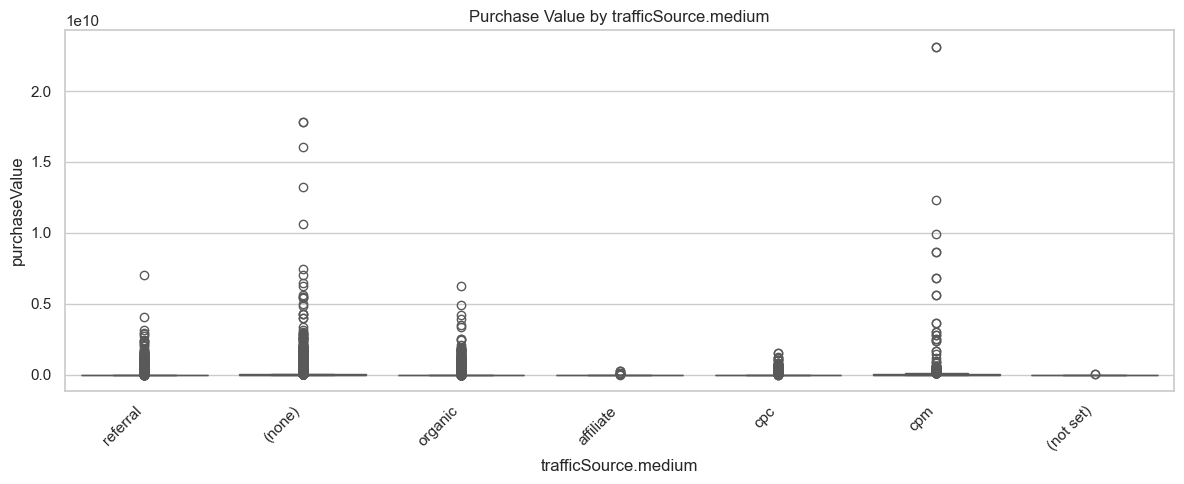

In [20]:
selected_cats = ['deviceType', 'userChannel', 'geoNetwork.city', 'browser', 'trafficSource.medium']

for cat in selected_cats:
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df, x=cat, y='purchaseValue')
    plt.title(f'Purchase Value by {cat}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

- ### Outliers are present in all user channels.
- ### Only a few browsers used widely has outliers
- ### trafficSource.medium also has outliers for all values

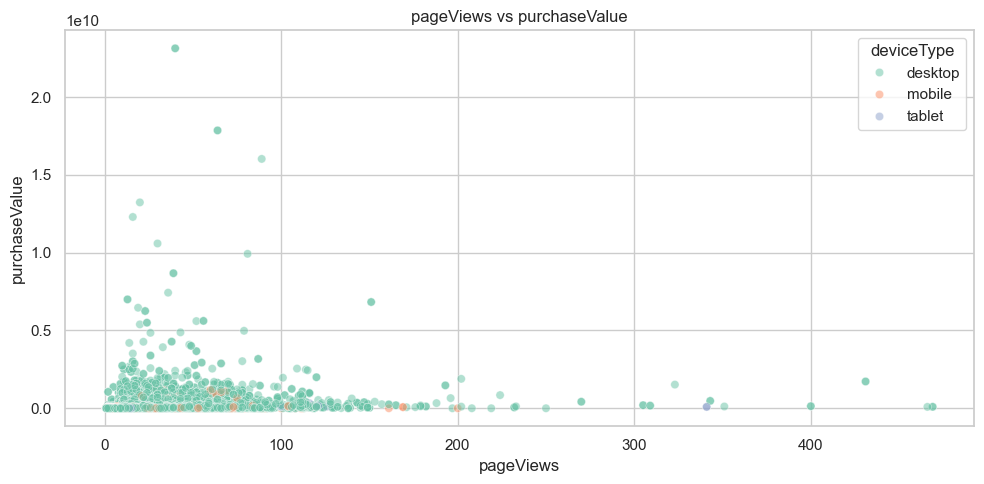

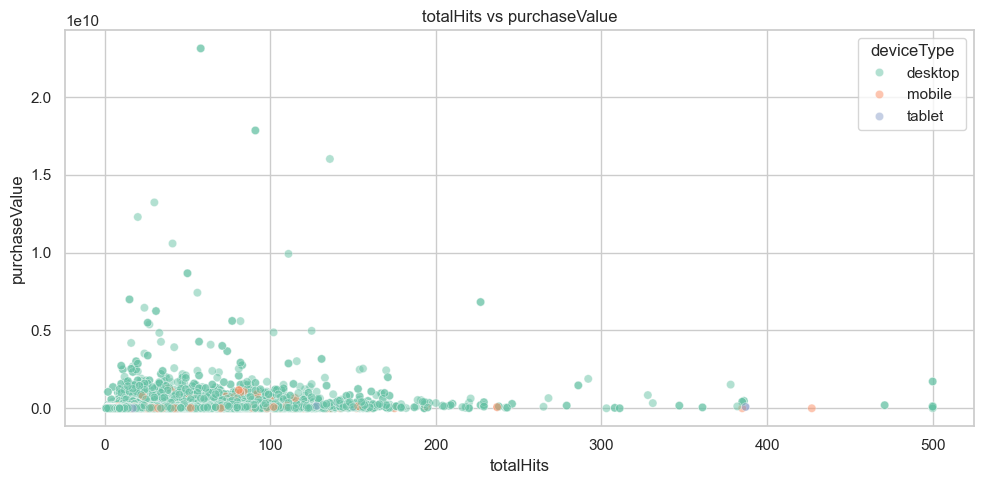

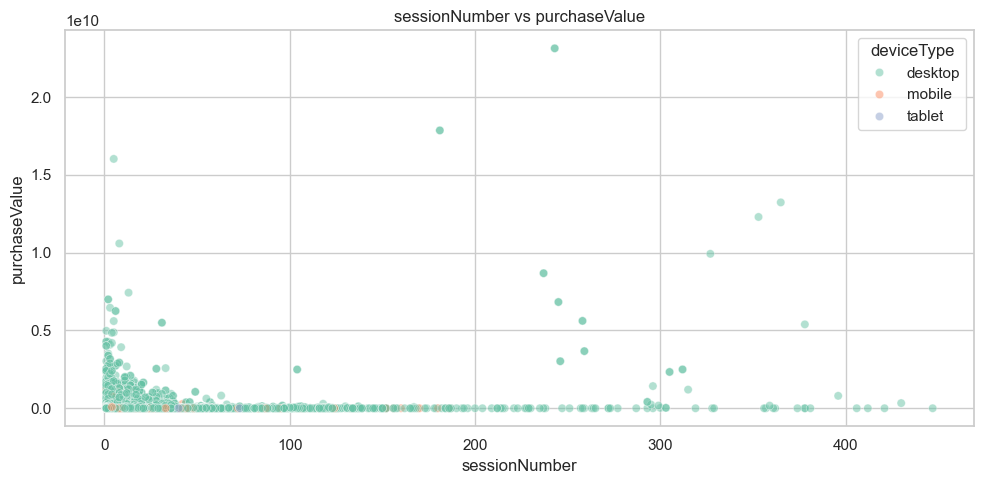

In [21]:
interactions = [('pageViews', 'purchaseValue'), ('totalHits', 'purchaseValue'), ('sessionNumber', 'purchaseValue')]

for x, y in interactions:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=x, y=y, hue='deviceType', alpha=0.5)
    plt.title(f'{x} vs {y}')
    plt.tight_layout()
    plt.show()

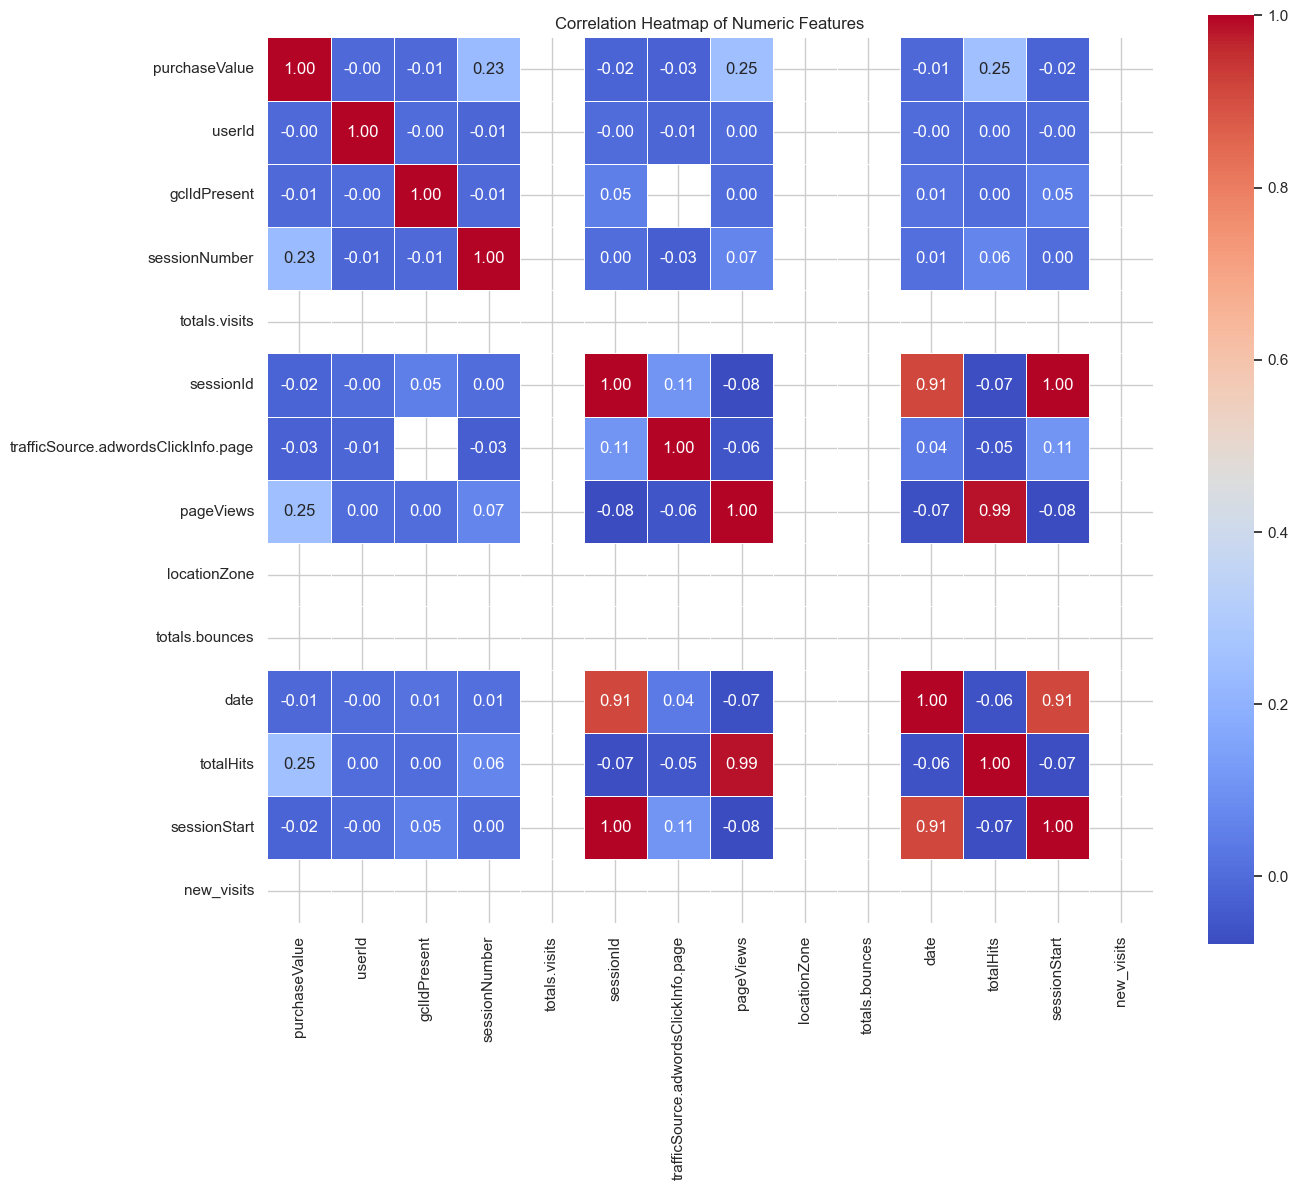

In [22]:
plt.figure(figsize=(14, 12))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

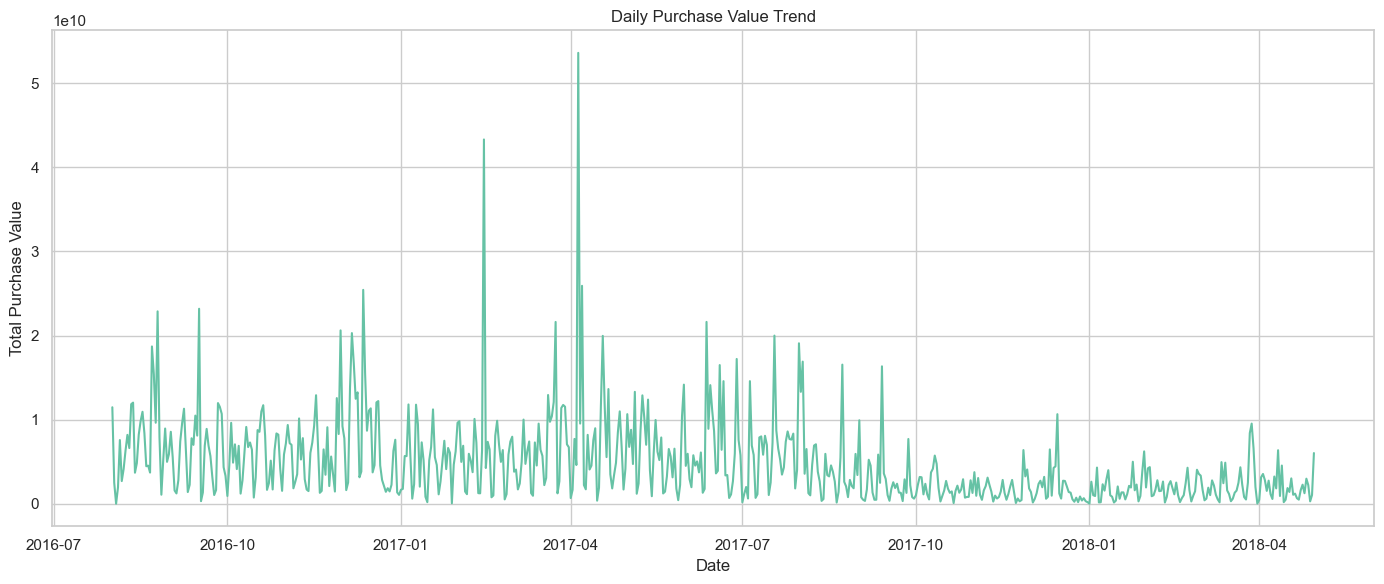

In [23]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
daily_trend = df.groupby('date')['purchaseValue'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_trend, x='date', y='purchaseValue')
plt.title("Daily Purchase Value Trend")
plt.xlabel("Date")
plt.ylabel("Total Purchase Value")
plt.tight_layout()
plt.show()

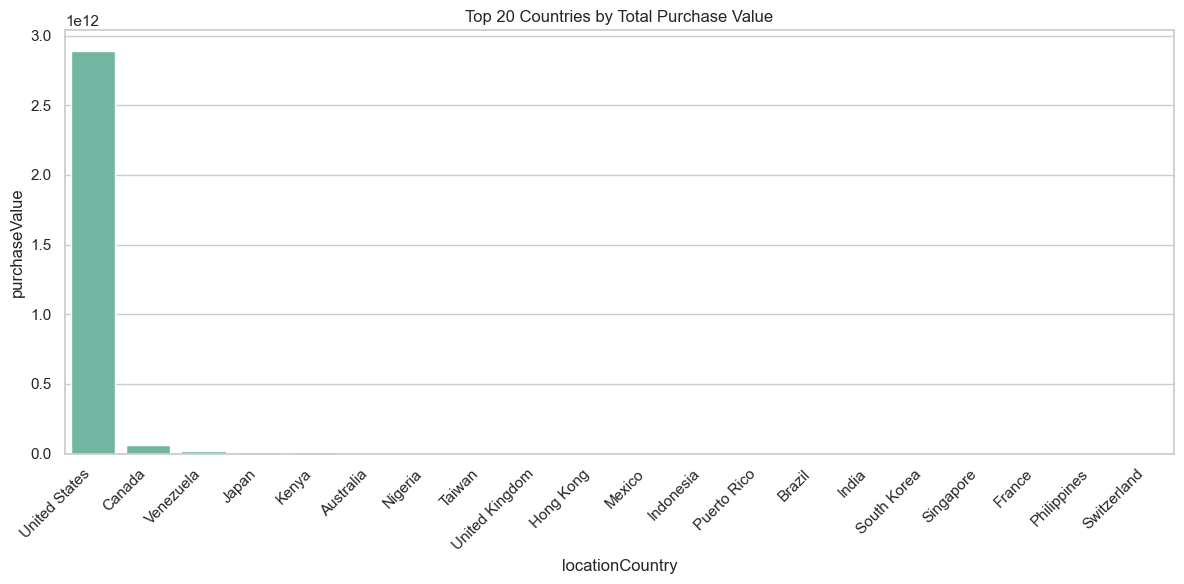

In [24]:
top_countries = df.groupby('locationCountry')['purchaseValue'].sum().nlargest(20).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='locationCountry', y='purchaseValue')
plt.title("Top 20 Countries by Total Purchase Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

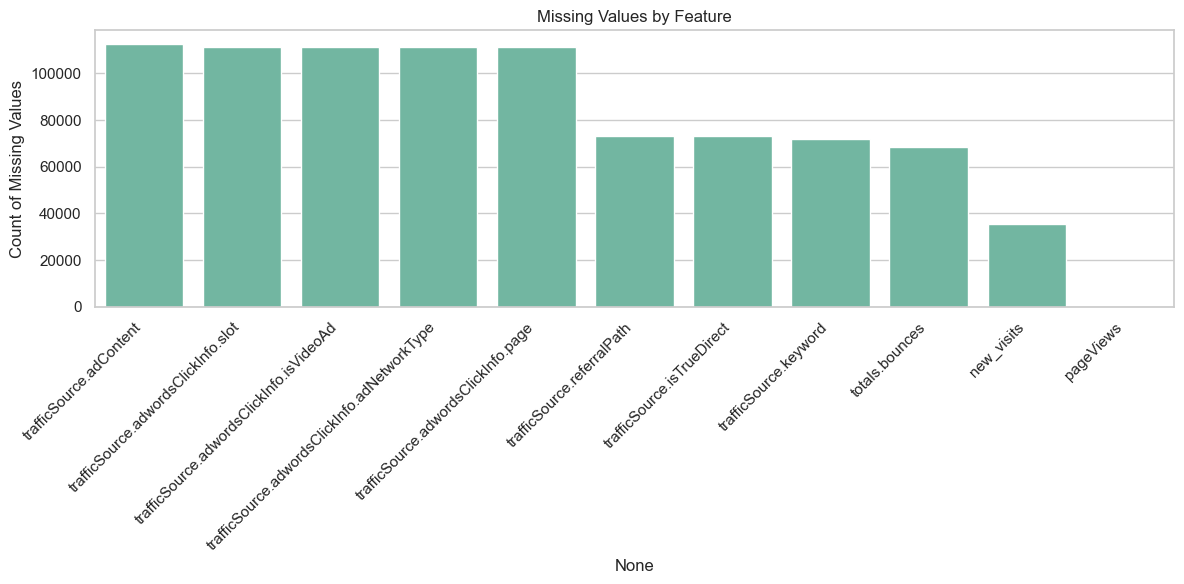

In [25]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing.index, y=missing.values)
plt.title("Missing Values by Feature")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

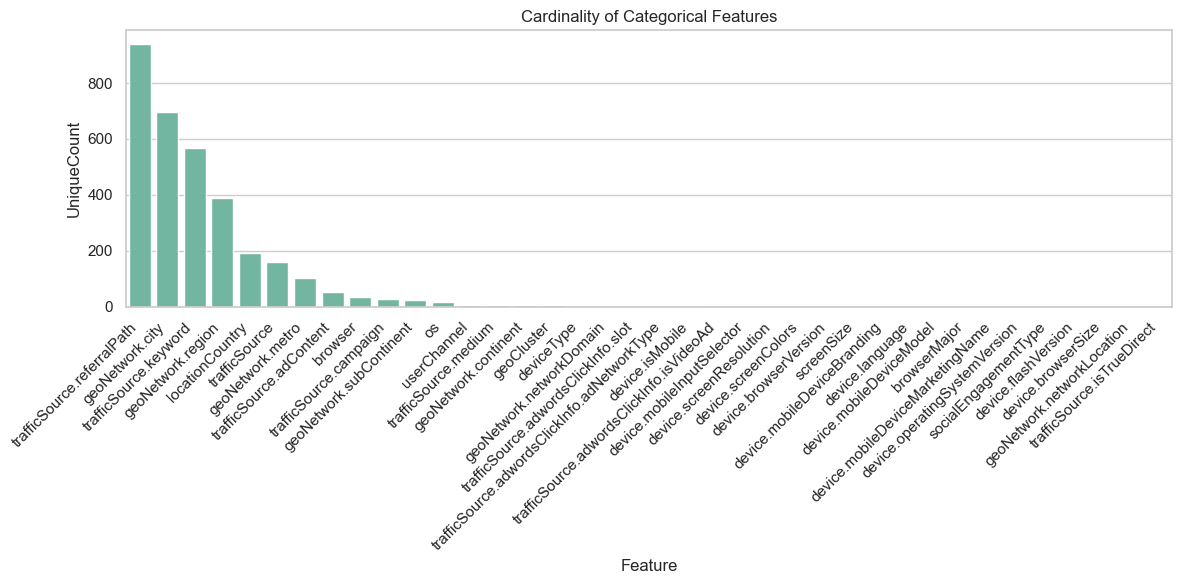

In [26]:
cardinality = {col: df[col].nunique() for col in categorical_cols}
card_df = pd.DataFrame(cardinality.items(), columns=['Feature', 'UniqueCount']).sort_values(by='UniqueCount', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=card_df, x='Feature', y='UniqueCount')
plt.title("Cardinality of Categorical Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- ### Most of the values are present near 0 indicating skewness
- ### Because of many missing values, correlation matrix is also sparse
- ### There are several peaks and dips in the time series
- ### US dominates largely in purchase value
- ### A few columns have very high cardinality due to the presence of large percentage of unique values

In [27]:
# !pip install ydata_profiling

In [28]:
from ydata_profiling import ProfileReport

# Create a profile report
profile = ProfileReport(df, title="Engage2Value Data Profile", explorative=True)

# Save to HTML
# profile.to_file("../reports/engage2value_profile.html")

## **DATA CLEANING AND FEATURE ENGINEERING**

In [29]:
def drop_constant_columns(df):
    constant_cols = [col for col in df.columns if df[col].nunique(dropna=False) == 1]
    return df.drop(columns=constant_cols), constant_cols

In [30]:
df, dropped_cols = drop_constant_columns(df)
print("Dropped Columns: ", dropped_cols)
print()
df.shape

Dropped Columns:  ['device.screenResolution', 'screenSize', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']



(115787, 35)

### Dropping columns having only single value across all samples

In [31]:
df['trafficSource.isTrueDirect'].unique()

array([nan, True], dtype=object)

In [32]:
df['trafficSource.isTrueDirect'].value_counts(dropna=False)

trafficSource.isTrueDirect
NaN     73050
True    42737
Name: count, dtype: int64

In [33]:
df['trafficSource.adwordsClickInfo.isVideoAd'].unique()

array([nan, False], dtype=object)

In [34]:
df['trafficSource.adwordsClickInfo.isVideoAd'].value_counts(dropna=False)

trafficSource.adwordsClickInfo.isVideoAd
NaN      111518
False      4269
Name: count, dtype: int64

In [35]:
df['totals.bounces'].unique()

array([ 1., nan])

In [36]:
df['totals.bounces'].value_counts(dropna=False)

totals.bounces
NaN    68666
1.0    47121
Name: count, dtype: int64

In [37]:
df['new_visits'].unique()

array([ 1., nan])

In [38]:
df['new_visits'].value_counts(dropna=False)

new_visits
1.0    80395
NaN    35392
Name: count, dtype: int64

In [39]:
df['trafficSource.isTrueDirect'] = df['trafficSource.isTrueDirect'].fillna(False)

df['trafficSource.isTrueDirect'].value_counts(dropna=False)

trafficSource.isTrueDirect
False    73050
True     42737
Name: count, dtype: int64

In [40]:
df['totals.bounces'] = df['totals.bounces'].fillna(0.0)

df['totals.bounces'].value_counts(dropna=False)

totals.bounces
0.0    68666
1.0    47121
Name: count, dtype: int64

In [41]:
df['new_visits'] = df['new_visits'].fillna(0.0)

df['new_visits'].value_counts(dropna=False)

new_visits
1.0    80395
0.0    35392
Name: count, dtype: int64

In [42]:
df.drop('trafficSource.adwordsClickInfo.isVideoAd', axis=1, inplace=True)

- ### Filling obvious values in columns: trafficSource.isTrueDirect, totals.bounces, new_visits in place of null values
- ### Dropping isVideoAd as lots of missing values are there which can't be imputed

In [43]:
df.shape

(115787, 34)

In [44]:
for col in ['trafficSource.adContent', 'trafficSource.keyword', 'trafficSource.adwordsClickInfo.slot'
            , 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.page', 'trafficSource.referralPath']:
    print(col.upper())
    print(df[col].value_counts(dropna=False))
    print('-'*50)

TRAFFICSOURCE.ADCONTENT
trafficSource.adContent
NaN                                   112826
Google Merchandise Store                1410
Google Merchandise Collection            649
Display Ad created 3/11/14               135
Placement Accessores 300 x 250           114
Google Online Store                      104
Smart display ad - 8/17/2017              87
Full auto ad IMAGE ONLY                   61
Ad from 12/13/16                          50
Official Google Merchandise               46
Ad from 11/3/16                           39
Ad from 12/15/17                          34
{KeyWord:Google Brand Items}              26
Display Ad created 3/11/15                25
{KeyWord:Google Merchandise}              17
Swag with Google Logos                    16
Placement Drinkware 300x250               13
{KeyWord:Google Branded Gear}             12
BQ                                        11
Placement Accessories 160 x 600           10
Placement Elecronics 300 x 250             9
20% dis

In [45]:
# Deriving a categorical column instead of actual referral path which is very noisy
df['has_referral'] = df['trafficSource.referralPath'].notna().astype(int)

In [46]:
# Drop sparse columns
cols_to_drop = [
    'trafficSource.adContent',
    'trafficSource.keyword',
    'trafficSource.adwordsClickInfo.slot',
    'trafficSource.adwordsClickInfo.adNetworkType',
    'trafficSource.adwordsClickInfo.page',
    'trafficSource.referralPath',  # we’ve derived has_referral from this
]
df.drop(columns=cols_to_drop, inplace=True)

- ### Dropping 6 more columns due to high sparsity
- ### Derived has_referral from trafficSource.referralPath

In [47]:
df.shape

(115787, 29)

In [48]:
for col in ['browser', 'trafficSource.campaign', 'gclIdPresent']:
    print(col.upper())
    print(df[col].value_counts(dropna=False))
    print('-'*50)

BROWSER
browser
Chrome                                                  84312
Safari                                                  19160
Firefox                                                  4026
Internet Explorer                                        2152
Android Webview                                          1471
Edge                                                     1214
Safari (in-app)                                           791
Opera Mini                                                732
Samsung Internet                                          563
Opera                                                     546
UC Browser                                                296
YaBrowser                                                 187
Amazon Silk                                                73
Coc Coc                                                    61
Android Browser                                            59
Mozilla Compatible Agent                              

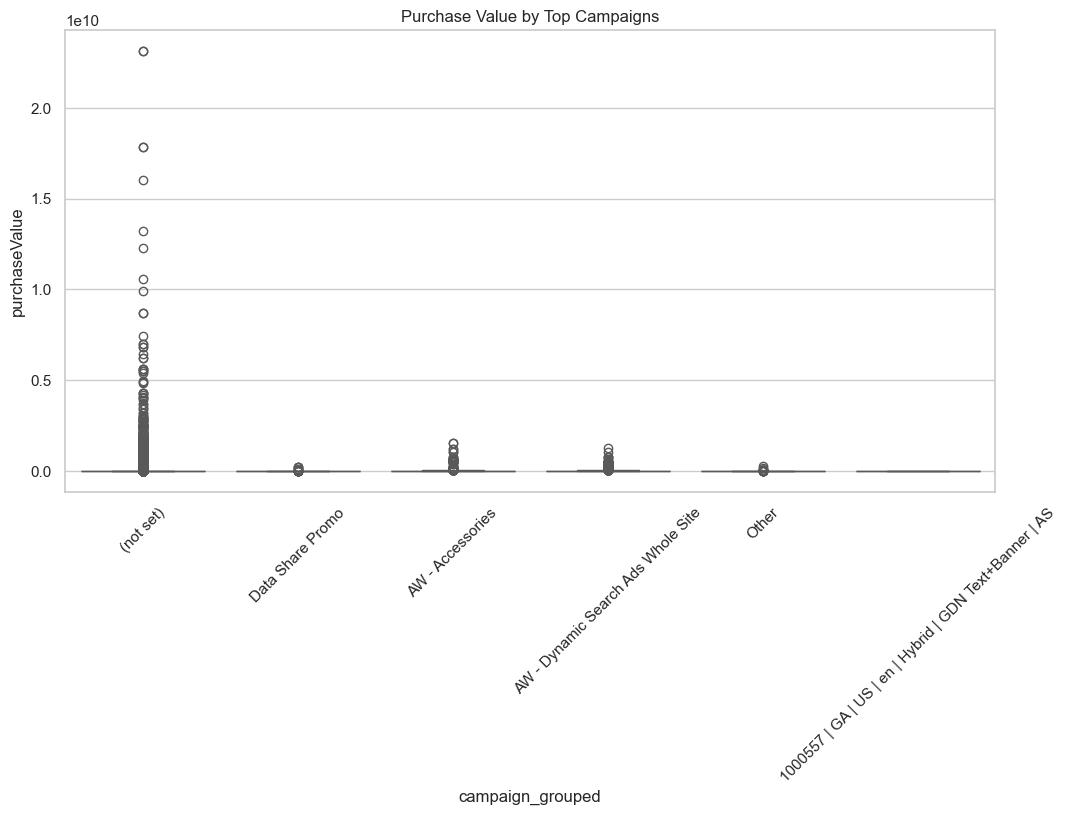

In [49]:
top_campaigns = df['trafficSource.campaign'].value_counts().head(5).index
df['campaign_grouped'] = df['trafficSource.campaign'].apply(lambda x: x if x in top_campaigns else 'Other')

sns.boxplot(data=df, x='campaign_grouped', y='purchaseValue')
plt.xticks(rotation=45)
plt.title("Purchase Value by Top Campaigns")
plt.show()

In [50]:
df.drop(columns=['campaign_grouped'], inplace=True)

### Visualized to see if it would be useful to include binning of campaign name (NO, IT WON'T BE)

In [51]:
# Handling browser imbalance
browser_counts = df['browser'].value_counts()
rare_browsers = browser_counts[browser_counts < 200].index
df['browser'] = df['browser'].replace(rare_browsers, 'Other')

In [52]:
# Campaign flag
df['is_campaign_set'] = (df['trafficSource.campaign'] != '(not set)').astype(int)
df.drop(columns=['trafficSource.campaign'], inplace=True)

In [53]:
for col in ['browser', 'is_campaign_set']:
    print(col.upper())
    print(df[col].value_counts(dropna=False))
    print('-'*50)

BROWSER
browser
Chrome               84312
Safari               19160
Firefox               4026
Internet Explorer     2152
Android Webview       1471
Edge                  1214
Safari (in-app)        791
Opera Mini             732
Samsung Internet       563
Opera                  546
Other                  524
UC Browser             296
Name: count, dtype: int64
--------------------------------------------------
IS_CAMPAIGN_SET
is_campaign_set
0    110058
1      5729
Name: count, dtype: int64
--------------------------------------------------


- ### Binning browser feature
- ### Imputed binary categories instead of real campaign names which were too noisy

In [54]:
df.shape

(115787, 29)

In [55]:
df.drop(columns=[
    'sessionId',
    'geoNetwork.continent'  # similar to 'geoNetwork.subContinent'
], inplace=True)

In [56]:
df.shape

(115787, 27)

In [57]:
df.isnull().sum()

trafficSource.isTrueDirect    0
purchaseValue                 0
browser                       0
geoCluster                    0
userId                        0
geoNetwork.networkDomain      0
gclIdPresent                  0
sessionNumber                 0
geoNetwork.region             0
trafficSource                 0
os                            0
geoNetwork.subContinent       0
trafficSource.medium          0
locationCountry               0
geoNetwork.city               0
geoNetwork.metro              0
pageViews                     8
totals.bounces                0
date                          0
deviceType                    0
userChannel                   0
totalHits                     0
sessionStart                  0
device.isMobile               0
new_visits                    0
has_referral                  0
is_campaign_set               0
dtype: int64

In [58]:
df['pageViews'].fillna(0, inplace=True)

In [59]:
# convert date and sessionStart
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

df['hour'] = pd.to_datetime(df['sessionStart'], unit='s').dt.hour

In [60]:
# Drop unnecessary or noisy columns
df.drop(columns=['userId', 'geoNetwork.networkDomain', 'date', 'sessionStart'], inplace=True)

- ### Dropped ID columns
- ### Kept subContinent in place of continent which was redundant
- ### Derived meaningful features from date columns

In [61]:
df.shape

(115787, 26)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115787 entries, 0 to 116022
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   trafficSource.isTrueDirect  115787 non-null  bool   
 1   purchaseValue               115787 non-null  float64
 2   browser                     115787 non-null  object 
 3   geoCluster                  115787 non-null  object 
 4   gclIdPresent                115787 non-null  int64  
 5   sessionNumber               115787 non-null  int64  
 6   geoNetwork.region           115787 non-null  object 
 7   trafficSource               115787 non-null  object 
 8   os                          115787 non-null  object 
 9   geoNetwork.subContinent     115787 non-null  object 
 10  trafficSource.medium        115787 non-null  object 
 11  locationCountry             115787 non-null  object 
 12  geoNetwork.city             115787 non-null  object 
 13  geoNetwork.metro   

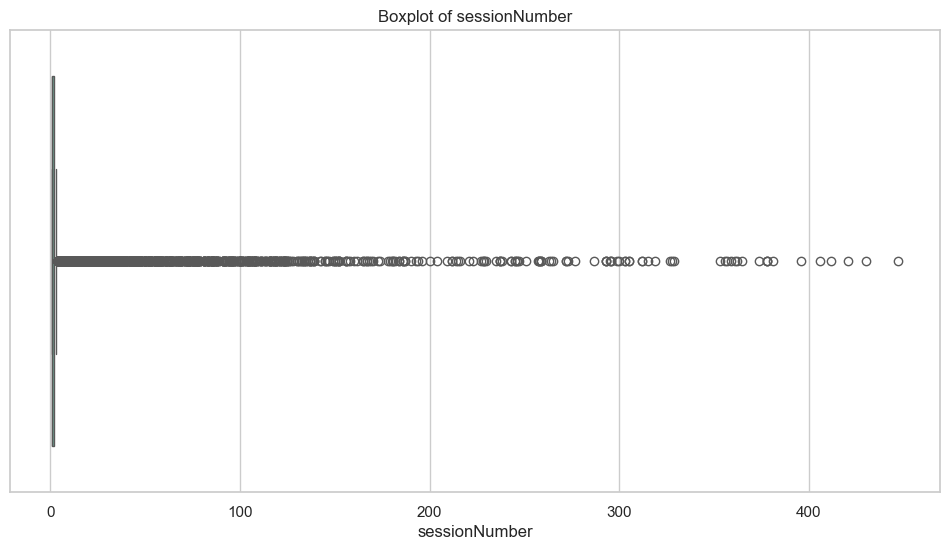

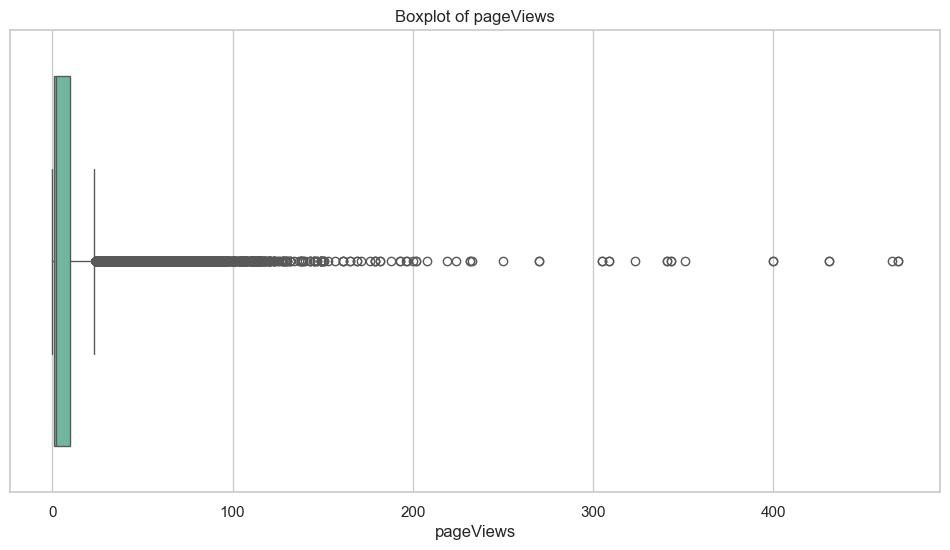

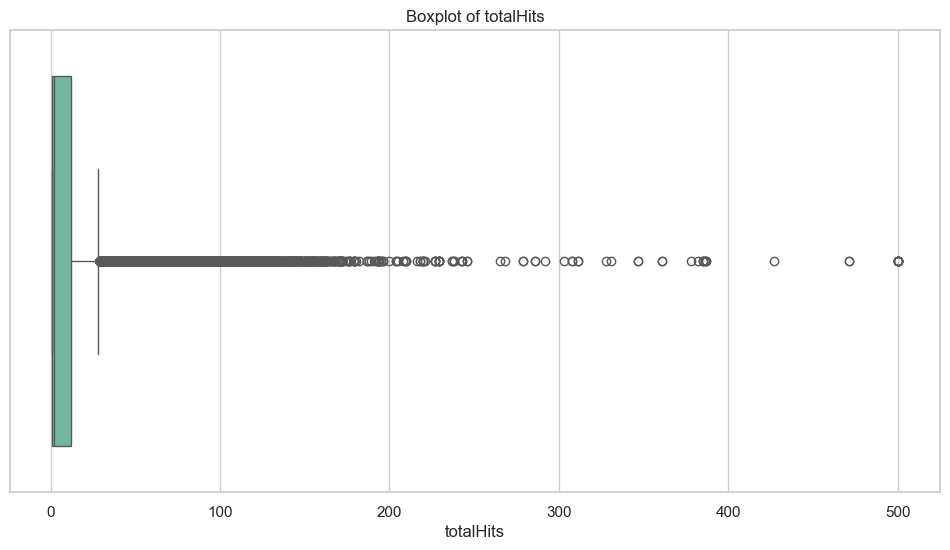

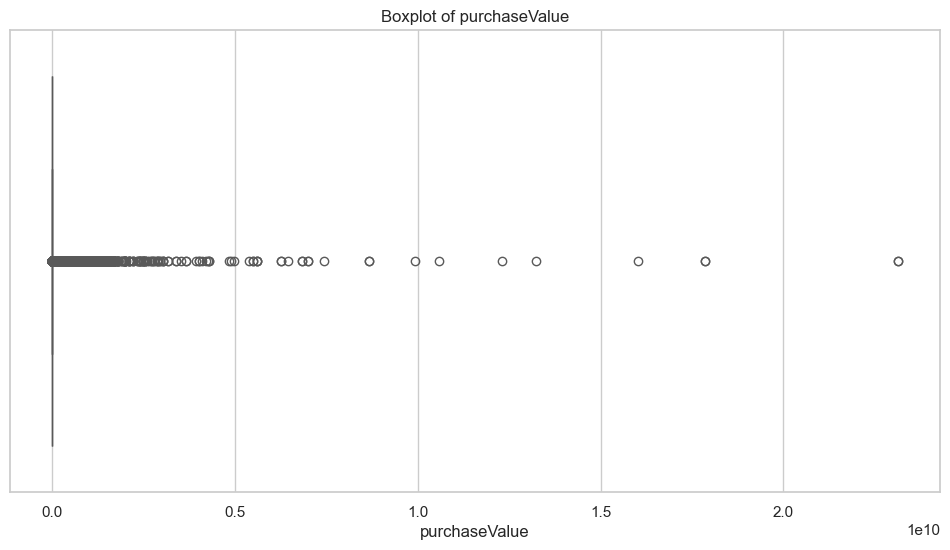

In [63]:
num_cols = ['sessionNumber', 'pageViews', 'totalHits', 'purchaseValue']
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [64]:
df['log_purchaseValue'] = np.log1p(df['purchaseValue'])
df['log_sessionNumber'] = np.log1p(df['sessionNumber'])
df['log_pageViews'] = np.log1p(df['pageViews'])
df['log_totalHits'] = np.log1p(df['totalHits'])

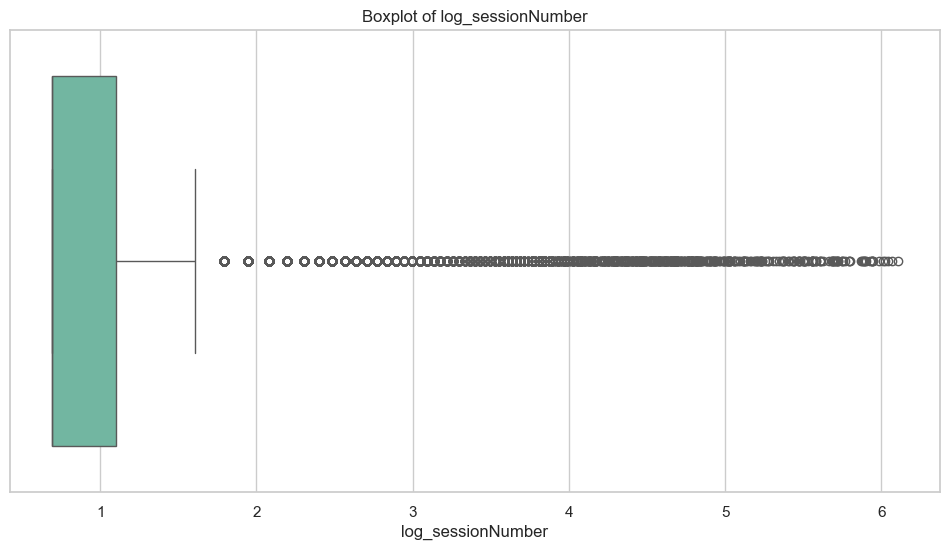

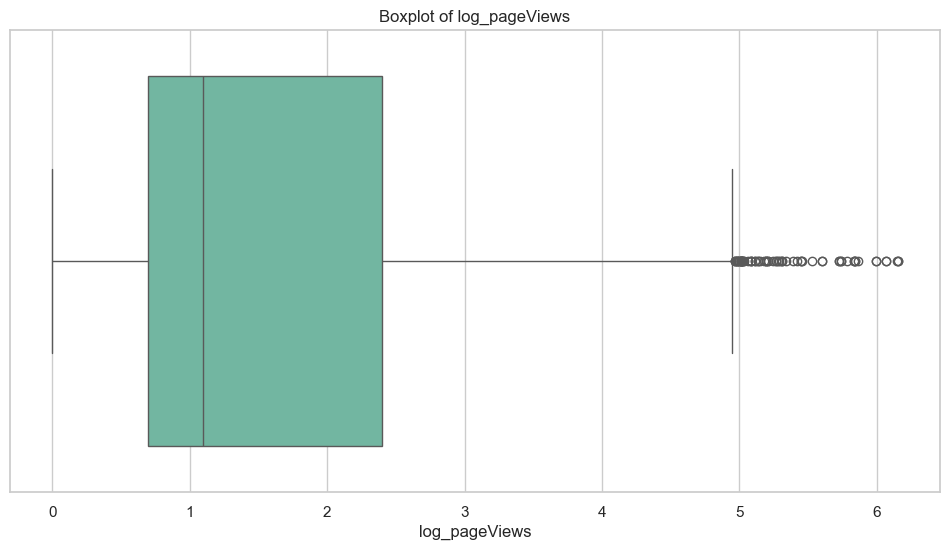

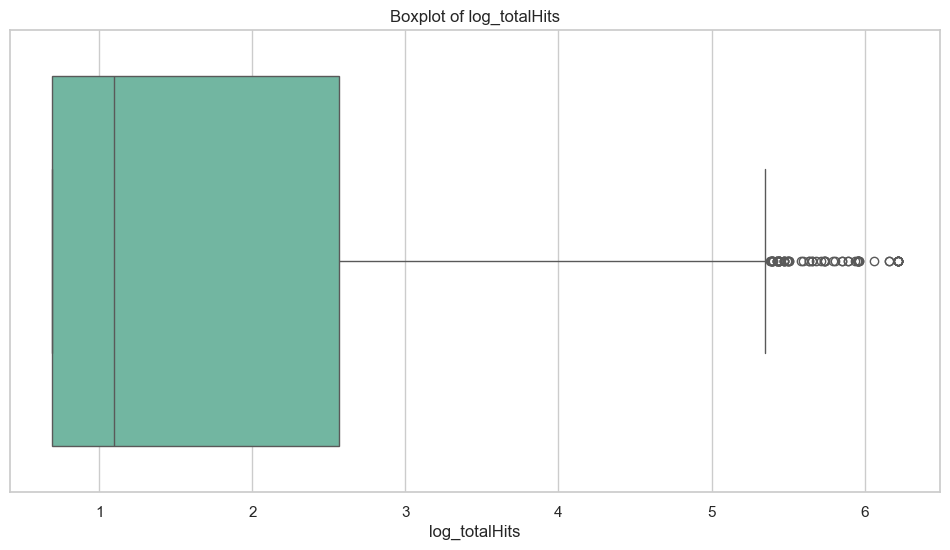

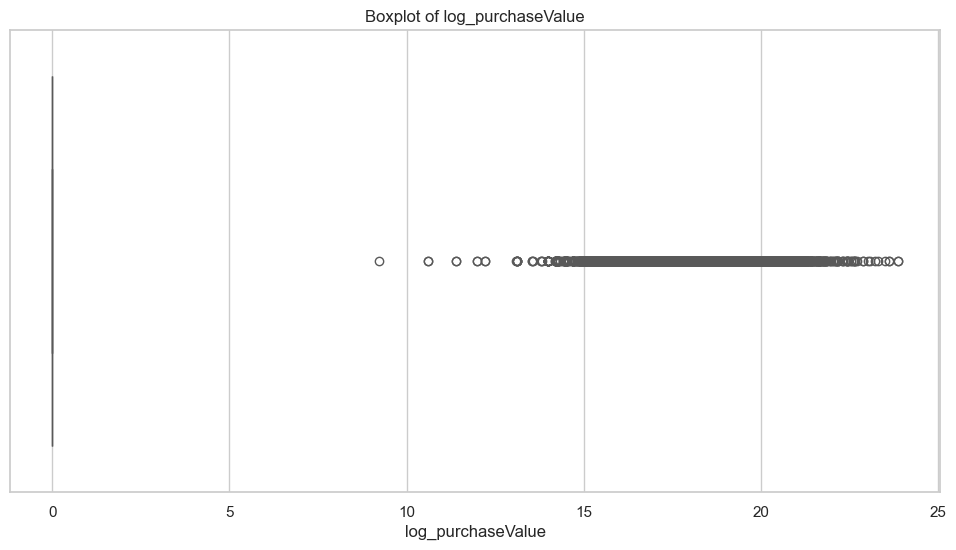

In [65]:
num_cols = ['log_sessionNumber', 'log_pageViews', 'log_totalHits', 'log_purchaseValue']
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [66]:
for col in df.columns:
    print(col.upper() + " (" + str(df[col].dtype) + ")")
    print(df[col].value_counts(dropna=False))
    print('-'*50)

TRAFFICSOURCE.ISTRUEDIRECT (bool)
trafficSource.isTrueDirect
False    73050
True     42737
Name: count, dtype: int64
--------------------------------------------------
PURCHASEVALUE (float64)
purchaseValue
0.0            91990
16990000.0       440
18990000.0       325
33590000.0       301
19990000.0       288
               ...  
27130000.0         1
36110000.0         1
77960000.0         1
33170000.0         1
169750000.0        1
Name: count, Length: 6766, dtype: int64
--------------------------------------------------
BROWSER (object)
browser
Chrome               84312
Safari               19160
Firefox               4026
Internet Explorer     2152
Android Webview       1471
Edge                  1214
Safari (in-app)        791
Opera Mini             732
Samsung Internet       563
Opera                  546
Other                  524
UC Browser             296
Name: count, dtype: int64
--------------------------------------------------
GEOCLUSTER (object)
geoCluster
Region_2    232

In [67]:
df.drop(columns=['sessionNumber', 'pageViews', 'totalHits', 'purchaseValue'], inplace=True)

- ### Visualized numeric columns to find out their skewness and presence of outliers
- ### Log transformed them to not lose their spread and decrease the impact
- ### Dropped original ones

## **PREPROCESSING PIPELINE**

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

# Data Type Conversions
def convert_binary_to_int(df):
    df = df.copy()
    df['trafficSource.isTrueDirect'] = df['trafficSource.isTrueDirect'].astype(int)
    df['device.isMobile'] = df['device.isMobile'].astype(int)
    df['totals.bounces'] = df['totals.bounces'].astype(int)
    df['new_visits'] = df['new_visits'].astype(int)
    return df

binary_convertor = FunctionTransformer(convert_binary_to_int)

# Robust Scaler on Already Log Transformed Features
log_scaled_features = ['log_pageViews', 'log_totalHits', 'log_sessionNumber']
log_scaler = Pipeline([
    ('robust_scaler', RobustScaler())
])

# OneHot Encoding for Categorical Features
categorical_features = [
    'browser', 'geoCluster', 'geoNetwork.region', 'trafficSource', 'os',
    'geoNetwork.subContinent', 'trafficSource.medium', 'locationCountry',
    'geoNetwork.city', 'geoNetwork.metro', 'deviceType', 'userChannel'
]
categorical_encoder = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Remaining Numeric Features (pass-through)
numeric_pass_through = [
    'log_sessionNumber', 'gclIdPresent', 'day_of_week',
    'month', 'hour', 'has_referral', 'is_campaign_set'
]

# Column Transformer
preprocessor = ColumnTransformer([
    ('log_scaling', log_scaler, log_scaled_features),
    ('cat_encoding', categorical_encoder, categorical_features),
    ('pass_through', 'passthrough', numeric_pass_through),
])

# Full Pipeline
full_pipeline = Pipeline([
    ('binary_conversion', binary_convertor),
    ('preprocessing', preprocessor)
])

In [69]:
df.head()

,trafficSource.isTrueDirect,browser,geoCluster,gclIdPresent,geoNetwork.region,trafficSource,os,geoNetwork.subContinent,trafficSource.medium,locationCountry,geoNetwork.city,geoNetwork.metro,totals.bounces,deviceType,userChannel,device.isMobile,new_visits,has_referral,is_campaign_set,day_of_week,month,hour,log_purchaseValue,log_sessionNumber,log_pageViews,log_totalHits
0,False,Edge,Region_2,0,Washington,youtube.com,Windows,Northern America,referral,United States,Redmond,Seattle-Tacoma WA,1.0,desktop,Social,False,1.0,1,0,4,7,6,0.000000,0.693147,0.693147,0.693147
1,True,Chrome,Region_3,0,California,(direct),Macintosh,Northern America,(none),United States,Mountain View,San Francisco-Oakland-San Jose CA,1.0,desktop,Direct,False,1.0,0,0,4,5,6,0.000000,0.693147,0.693147,0.693147
2,True,Chrome,Region_2,0,Lombardy,google,Windows,Southern Europe,organic,Italy,Milan,(not set),0.0,desktop,Organic Search,False,0.0,0,0,4,10,14,0.000000,1.098612,1.945910,1.945910
3,False,Internet Explorer,Region_4,0,not available in demo dataset,youtube.com,Windows,Eastern Asia,referral,Japan,not available in demo dataset,not available in demo dataset,1.0,desktop,Social,False,1.0,1,0,1,1,8,0.000000,0.693147,0.693147,0.693147
4,True,Chrome,Region_3,0,not available in demo dataset,(direct),Windows,Northern America,(none),United States,not available in demo dataset,not available in demo dataset,0.0,desktop,Direct,False,1.0,0,0,3,10,1,18.303585,0.693147,4.007333,4.204693


In [70]:
y = df['log_purchaseValue']
X = df.drop(columns=['log_purchaseValue'])

## **SPLITTING TO TRAINING AND TESTING DATA**

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [72]:
X_train_transformed = full_pipeline.fit_transform(X_train)
X_test_transformed = full_pipeline.transform(X_test)

c:\users\hp\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
X_train_transformed.shape

(92629, 1562)

## **MODEL BUILDING**

In [74]:
X_train_transformed_named = pd.DataFrame(X_train_transformed, columns=[f"feature_{i}" for i in range(X_train_transformed.shape[1])])
X_train_transformed_named.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,featu

In [75]:
X_test_transformed_named = pd.DataFrame(X_test_transformed, columns=[f"feature_{i}" for i in range(X_train_transformed.shape[1])])
X_test_transformed_named.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,featu

## RANDOM FOREST REGRESSOR

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train_transformed_named, y_train)
y_pred = rf.predict(X_test_transformed_named)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Random Forest Regressor Performance:")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 R² Score: {r2:.4f}")

Random Forest - R2: 0.8069038956801743


## XGBOOST REGRESSOR

In [91]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
xgb_model.fit(X_train_transformed_named, y_train)
y_pred = xgb_model.predict(X_test_transformed_named)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 XGBoost Regressor Performance:")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 R² Score: {r2:.4f}")

XGBoost - R2: 0.813202973169555


## LIGHTGBM REGRESSOR

In [78]:
import lightgbm as lgb
from lightgbm import early_stopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [81]:
# Training the model
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(
    X_train_transformed_named, y_train,
    eval_set=[(X_train_transformed_named, y_train), (X_test_transformed_named, y_test)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=50)],
)

# Making predictions
y_pred = lgb_model.predict(X_test_transformed_named)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 LightGBM Regressor Performance:")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 R² Score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1664
[LightGBM] [Info] Number of data points in the train set: 92629, number of used features: 508
[LightGBM] [Info] Start training from score 3.656273
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[979]	training's rmse: 2.62814	training's l2: 6.9071	valid_1's rmse: 3.09106	valid_1's l2: 9.55466

📊 LightGBM Regression Performance:
🔹 RMSE: 3.0911
🔹 MAE: 1.1884
🔹 R² Score: 0.8166


In [ ]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import Ridge

# estimators = [
#     ('rf', rf),
#     ('xgb', xgb_model),
#     ('lgb', lgb_model)
# ]

# stacking = StackingRegressor(estimators=estimators, final_estimator=Ridge())
# stacking.fit(X_train_transformed_named, y_train)
# y_pred = stacking.predict(X_test_transformed_named)
# print("Stacking Regressor - R2:", r2_score(y_test, y_pred))

### On basis of R2 Score: **LightGBM > XGBoost > Random Forest**

## **ARTIFICIAL NEURAL NETWORK**

In [ ]:
!pip install tensorflow

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed_named)
X_test_scaled = scaler.transform(X_test_transformed_named)

In [86]:
def build_ann(input_dim):
    model = Sequential([
        Dense(256, input_dim=input_dim, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(1)  # Regression output
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mae']
    )
    
    return model

In [87]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [88]:
input_dim = X_train_scaled.shape[1]
ann_model = build_ann(input_dim)

history = ann_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=200,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/200
362/362 [==============================] - 8s 14ms/step - loss: 22.1298 - mae: 3.0860 - val_loss: 12.5294 - val_mae: 1.6975 - lr: 0.0010
Epoch 2/200
362/362 [==============================] - 4s 12ms/step - loss: 13.5326 - mae: 2.0123 - val_loss: 11.9079 - val_mae: 1.5237 - lr: 0.0010
Epoch 3/200
362/362 [==============================] - 4s 12ms/step - loss: 12.7283 - mae: 1.8688 - val_loss: 11.5425 - val_mae: 1.4851 - lr: 0.0010
Epoch 4/200
362/362 [==============================] - 4s 12ms/step - loss: 12.4005 - mae: 1.7949 - val_loss: 11.7441 - val_mae: 1.5287 - lr: 0.0010
Epoch 5/200
362/362 [==============================] - 4s 12ms/step - loss: 12.0808 - mae: 1.7377 - val_loss: 11.5855 - val_mae: 1.4849 - lr: 0.0010
Epoch 6/200
362/362 [==============================] - 4s 12ms/step - loss: 11.8470 - mae: 1.6982 - val_loss: 11.2843 - val_mae: 1.5041 - lr: 0.0010
Epoch 7/200
362/362 [==============================] - 4s 12ms/step - loss: 11.6401 - mae: 1.6687 - val_lo

In [89]:
y_pred_ann = ann_model.predict(X_test_scaled).flatten()

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\n📊 ANN Regression Performance (log scale):")
print(f"🔹 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ann)):.4f}")
print(f"🔹 MAE: {mean_absolute_error(y_test, y_pred_ann):.4f}")
print(f"🔹 R² Score: {r2_score(y_test, y_pred_ann):.4f}")

724/724 [==============================] - 1s 2ms/step

📊 ANN Regression Performance (log scale):
🔹 RMSE: 3.2310
🔹 MAE: 1.1664
🔹 R² Score: 0.7996


### Machine Learning Models performed better than ANN here